# Decision Trees

Decision trees model belongs to Supervised learning technique to solve either Regression or Classification type problems. As the name suggest, the process here is to narrow down the decision making process by creating branches and ultimately leaves to classify/predict output variable. The branch nodes represent the dataset features and leaves represent the outcomes. The model simply asks a question of Yes/No starting from the root node and depending on the answer it will either create a new branch or add to the existing branch. The process continues till the decision is reached and leaf nodes are created as outcomes, thus creating a tree like structure in a graphical representation. One thing to note here is, the more the number of predictor variables the more branches and bigger a tree.

Consider an app recommender program/model. Assume we have a data of gender, occupation of few users and what apps they use.
We can classify this based on either gender or occupation and recommend appropriate app. But is this accurate? Well, it's never accurate but it must be close to accurate. If gender and occupation are both combined as predictor variables to recommend the app we can get better results. 


![App](App.png)


Another example is of student admissions based on their test scores and grades. Below we can depict that the data is well classified by a vertical line at test score 5 and further classification through grades will provide more accurate outcomes of whether a student should be accepted or rejected based on two variables mentioned above.

![add](add.png)


## Entropy:

In physics, entropy is defined as the amount of randomness, or amount of freedom the atoms have to move in its current state. So any gas has the highest entropy in all states of matter. This can be co-related with the amount of probability in statistics. The more the probability of an event to occur the more entropy of that state.

Entropy formula is given in terms of average of logarithm addition of the probabilites of events to occur for a given situation. This might be confusing to understand at first. Now, consider an example of probablity of winning in a game where we have to pick the same combination of balls available in the bucket. See below:

![ballGame](ballGame.png)


Here, the probabality of winning a game in each bucket is the product of the all the probabilities of picking a ball of each colour out of total number of balls. 

![log1](log1.png)

The log values returned are negative, hence negative of log is taken so that we the get entropy to be positive. This can be generalized by a formula given below where m and n are number of variables.


$Entropy = -\left(\frac{m}{m+n}\right) log_2\left(\frac{m}{m+n}\right) - \left(\frac{n}{m+n}\right) log_2\left(\frac{n}{m+n}\right)$

![formula](formula.png)


### Problem Statement 1:

What is the entropy for a bucket with a ratio of four red balls to ten blue balls? Input your answer to at least three decimal places.

In [11]:
import math # This will import math module
# assign values of m and n
m, n = 4, 10

entropy = -(m/(m+n)) *math.log2(m/(m+n)) -(n/(m+n)) *math.log2(n/(m+n)) 
print("Entropy value is {:0.3f}".format(entropy))

Entropy value is 0.863


Above entropy equation can be more generalized for multi class case as:


$Entropy = -p_1 log_2(p_n) - p_2 log_2(p_2) - ....  - \sum \limits _{i=1} ^{n}p_n log_2(p_n)$

### Problem Statement 2:

If we have a bucket with eight red balls, three blue balls, and two yellow balls, what is the entropy of the set of balls? Input your answer to at least three decimal places.

In [4]:
# create a list of items
li = [8,3,2]
entropy=0
for i in range(len(li)):
    entropy = entropy -(li[i]/sum(li) *math.log2(li[i]/sum(li)))
    
print("Entropy value is {:0.3f}".format(entropy))

Entropy value is 1.335


### Information Gain:

Information gain is the amount of change in entropy. Well, initially the model is unorganized, when we perform different algorithms or make a decision tree the entropy of each node will keep changing. So the information gain will be the difference between entropy of parent and average entropy of its child. Information gain ranges from 0 to 1. Information gain 1 means the tree is having the best split of data while 0 means the worst split of data.

![info](info.png)

The idea is to generate or increase the information gain in a decision tree ultimately giving us the more justified split. Let's consider an earlier example of app recommendation to prove this.

![MaxInfo](MaxInfo.png)

In [8]:
# we will make a fun that will calculate entropy for us
def entropyCalc(li):
    entropy=0
    for i in range(len(li)):
        entropy = entropy -(li[i]/sum(li) *math.log2(li[i]/sum(li)))
    return round(entropy,2)

# Supply a list of items, 3 for Pokeom, 2 for whatsapp and 1 for snapchat

entropy_parent = entropyCalc([3,2,1])   
print("Parent Entropy value is {:0.2f}".format(entropy_parent))

#now we will split the data by gender, that is F and M. 
#child entropy for Female 
#we will have 2 whatspp and 1 pokemon among female users

entropy_child_F = entropyCalc([2,1])  
print("Child Entropy value of Female is {:0.2f}".format(entropy_child_F))

#Similary child entropy for Male
#we will have 2 Pokemon and 1 Whatsapp among male users

entropy_child_M = entropyCalc([2,1]) 
print("Child Entropy value of Male is {:0.2f}".format(entropy_child_M))
print("Information gain is : {:0.2f} \n".format(entropy_parent-(entropy_child_F+entropy_child_M)/2)) 

print("Our aim is to get closer to information gain of 1 so will split the data now with occupation\n")

# In occupation we have work and study as classifiers
# for Study we only have Pokemon with 3 users, hence
print("Parent Entropy value is {:0.2f}".format(entropy_parent))
entropy_child_S = entropyCalc([3]) 
print("Child Entropy value of Study is {:0.2f}".format(entropy_child_S))

# for Study we only have Pokemon with 2 whatsapp and 1 snapchat users, hence

entropy_child_W = entropyCalc([2,1]) 
print("Child Entropy value of Work is {:0.2f}".format(entropy_child_W))
print("Information gain is : {:0.2f} \n".format(entropy_parent-(entropy_child_S+entropy_child_W)/2)) 

print("So we can see that splitting data with occupation we get information gain of 1 which is what we would like as\nit splits the data perfectly.")



Parent Entropy value is 1.46
Child Entropy value of Female is 0.92
Child Entropy value of Male is 0.92
Information gain is : 0.54 

Our aim is to get closer to information gain of 1 so will split the data now with occupation

Parent Entropy value is 1.46
Child Entropy value of Study is 0.00
Child Entropy value of Work is 0.92
Information gain is : 1.00 

So we can see that splitting data with occupation we get information gain of 1 which is what we would like as
it splits the data perfectly.


However, we can still classify this further based on gender and get better results. So use information gain to determine which variable can be use to split the data and step by step develop the decision tree model.

![finalGain](finalGain.png)

### Problem Statement 3:

For the following quiz, consider the data found in this file, consisting of twenty-four made-up insects measured on their length and color.

Which of the following splitting criteria provides the most information gain for discriminating Mobugs from Lobugs?



In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Everything On This PC\Udacity\Intro to ML -TensorFlow\Decision Trees\ml-bugs.csv')
# get data of colors from dataframe
brown,blue,green =0,0,0
for data in df['Color']:
    if data=='Brown':
        brown+=1
    elif data=='Blue':
        blue+=1
    else:
        green+=1
        
#get the amount of Mobug and Lobug from dataframe
mobug, lobug =0,0
for data in df['Species']:
    if data == 'Mobug':
        mobug+=1
    else:
        lobug+=1 
mobug_L1,mobug_L2=0,0
lobug_L1,lobug_L2=0,0
for i in range(len(df['Color'])):
    if df['Length (mm)'][i] <17 and df['Species'][i] == "Mobug":
        mobug_L1 +=1
    elif df['Length (mm)'][i] >17 and df['Species'][i] == "Mobug":
        mobug_L2 +=1
    elif df['Length (mm)'][i] <17 and df['Species'][i] == "Lobug":
        mobug_L1 +=1
    elif df['Length (mm)'][i] >17 and df['Species'][i] == "Lobug":
        lobug_L2 +=1

print("Calculating parent entropy of Species first which is our classification variable\n")
entropy_parent = entropyCalc([mobug,lobug])
entropy_child_L1 = entropyCalc([mobug_L1,lobug_L1+mobug_L1])
entropy_child_L2 = entropyCalc([mobug_L2,lobug_L2+mobug_L2])
print("Parent Entropy value is {:0.5f}\nChild Entropy value is {:0.5f} and {:0.5f}".format(entropy_parent,entropy_child_L1,entropy_child_L2 ))

print("Information gain is : {:0.5f} \n".format(entropy_parent-(entropy_child_L1+entropy_child_L2)/2))


Calculating parent entropy of Species first which is our classification variable

Parent Entropy value is 0.98000
Child Entropy value is 1.00000 and 0.74000
Information gain is : 0.11000 



## Hyperparameters for Decision Tree:

There are few parameters in Decision Tree modeling which will help make the model generalize to different problems and useful for optimized classification. 

### Maximum Depth
Depth is the length of each branch and the largest possible length in a tree is the maximum depth. For a depth of k there will be $2^k$ leaves.

![maxDepth](maxDepth.png)

### Minimum Number of Samples to Split
There must be enough samples in the last node to split it into a new branch. Consider a case where minimum number of samples to split is 11.

![split](split.png)


### Minimum Number of samples per Leaf

There could be scenarios where the last split might have samples, say 25, while the other node having 2 samples. In this case we cannot further carry the splitting with the node having 2 samples and it will not result in good classification. With minimum number of samples per leaf, we can make sure that each node will have enough samples to make sense of data. The aim is to not have extremely large difference in samples of two leafs.  

![leaf](leaf.png)

### Problem Statement 4:

In this quiz, you'll be given the following sample dataset, and your goal is to define a model that gives 100% accuracy on it.

The data file can be found under the "data.csv" tab in the quiz below. It includes three columns, the first 2 comprising of the coordinates of the points, and the third one of the label.

The data will be loaded for you, and split into features X and labels y.
You'll need to complete each of the following steps:

**1. Build a decision tree model**

Create a decision tree classification model using scikit-learn's DecisionTreeClassifier and assign it to the variablemodel.

**2. Fit the model to the data**

You won't need to specify any of the hyperparameters, since the default ones will yield a model that perfectly classifies the training data. However, we encourage you to play with hyperparameters such as max_depth and min_samples_leaf to try to find the simplest possible model.

**3. Predict using the model**

Predict the labels for the training set, and assign this list to the variable y_pred.

**4. Calculate the accuracy of the model**

For this, use the function sklearn function accuracy_score. A model's accuracy is the fraction of all data points that it correctly classified.

When you hit Test Run, you'll be able to see the boundary region of your model, which will help you tune the correct parameters, in case you need them.

Note: This quiz requires you to find an accuracy of 100% on the training set. This is like memorizing the training data! A model designed to have 100% accuracy on training data is unlikely to generalize well to new data. If you pick very large values for your parameters, the model will fit the training set very well, but may not generalize well. Try to find the smallest possible parameters that do the job—then the model will be more likely to generalize well. (This aspect of the exercise won't be graded.)

Accuracy is : 1.0


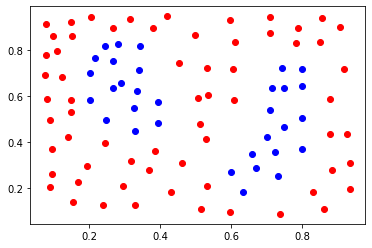

In [10]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data.
data = np.asarray(pd.read_csv(r'C:\Everything On This PC\Udacity\Intro to ML -TensorFlow\Decision Trees\data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,:2]
y = data[:,2]


# TODO: Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = DecisionTreeClassifier()

# TODO: Fit the model.

model.fit(X,y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y,y_pred)

print("Accuracy is : {}".format(acc))

for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0],X[i][1],color='b')
        
    else:
        plt.scatter(X[i][0],X[i][1],color='r')
        



## Case Study on Titanic Survival Model with Decision Trees:

The case study on titanic survival model with decision trees have been done in a seprate notebook. This can be found on my github profile. The main goal here was to bring the test accuracy above 85%. This was acheieved by hyperparameters of Decision tree model. The accuracy achieved is 86.03%.


A snippet of last solution that was implemented to find the best hyperparamters values is shown below:

![titanic](titanic.png)


# Resources:
---
Udacity.com. 2022. Machine Learning with TensorFlow | Intro to TensorFlow. [online] Available at: <https://www.udacity.com/course/intro-to-machine-learning-with-tensorflow-nanodegree--nd230> [Accessed 28 January 2022].

---



 